In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [117]:
xls = pd.ExcelFile('COVIDsurveytables30June2020.xlsx')
df1 = pd.read_excel(xls, 'sample size-daily')
df2 = pd.read_excel(xls, 'sample size-weekly')
df3 = pd.read_excel(xls, 'respondent demographics')
df4 = pd.read_excel(xls, 'comorbs all people in sample')

## Sample size - daily

In [22]:
df1 = df1[2:]
df1.columns = ['drop', 'date_joined', 'num_ppl', 'ppl_cumulative', 'num_house', 'house_cumulative']
df1 = df1.drop(['drop'], axis=1)

In [23]:
df1

,date_joined,num_ppl,ppl_cumulative,num_house,house_cumulative
2,20APR2020,423,423,166,166
3,21APR2020,1030,1453,415,581
4,22APR2020,764,2217,307,888
5,23APR2020,870,3087,357,1245
6,24APR2020,634,3721,261,1506
...,...,...,...,...,...
68,25JUN2020,35,7299,12,2861
69,26JUN2020,20,7319,8,2869
70,27JUN2020,5,7324,4,2873
71,28JUN2020,12,7336,4,2877


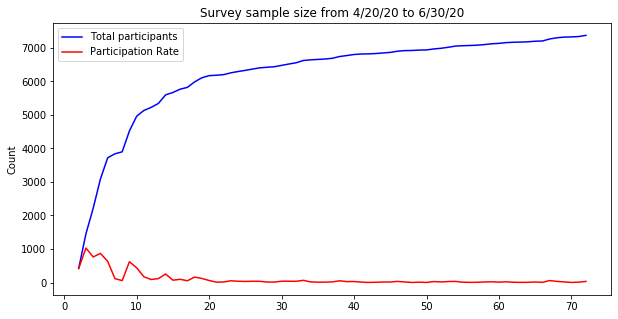

In [32]:
plt.subplots(1, sharex=True, figsize = (10, 5))
p_cumulative = df1['ppl_cumulative'].plot(kind='line', color = 'blue')
people = df1['num_ppl'].plot(kind='line', color = 'red')

plt.title("Survey sample size from 4/20/20 to 6/30/20")
plt.ylabel('Count')
plt.legend(('Total participants', 'Participation Rate'));

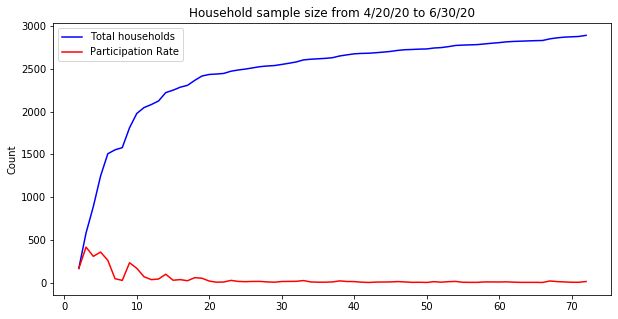

In [44]:
plt.subplots(1, sharex=True, figsize = (10, 5))
h_cumulative = df1['house_cumulative'].plot(kind='line', color = 'blue')
house = df1['num_house'].plot(kind='line', color = 'red')

plt.title("Household sample size from 4/20/20 to 6/30/20")
plt.ylabel('Count')
plt.legend(('Total households', 'Participation Rate'));

## Sample size - weekly

In [51]:
df2 = df2[2:]
df2.columns = ['drop', 'week_joined', 'num_ppl', 'ppl_cumulative', 'num_house', 'house_cumulative']
df2 = df2.drop(['drop'], axis=1)

In [52]:
df2

,week_joined,num_ppl,ppl_cumulative,num_house,house_cumulative
2,20APR2020,3898,3898,1578,1578
3,27APR2020,4709,8607,1891,3469
4,04MAY2020,4089,12696,1664,5133
5,11MAY2020,3352,16048,1400,6533
6,18MAY2020,2951,18999,1232,7765
7,25MAY2020,2687,21686,1139,8904
8,01JUN2020,2378,24064,1016,9920
9,08JUN2020,2322,26386,977,10897
10,15JUN2020,2171,28557,917,11814
11,22JUN2020,2139,30696,900,12714


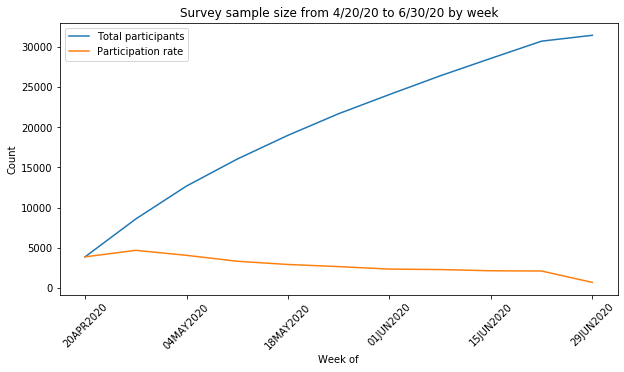

In [61]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot1 = df2.plot.line(x="week_joined", y="ppl_cumulative", label = 'Total participants', ax=ax)
plot2 = df2.plot.line(x="week_joined", y="num_ppl", label = 'Participation rate', ax=ax)
plt.xticks(rotation=45);
plt.title('Survey sample size from 4/20/20 to 6/30/20 by week')
plt.xlabel('Week of')
plt.ylabel('Count');

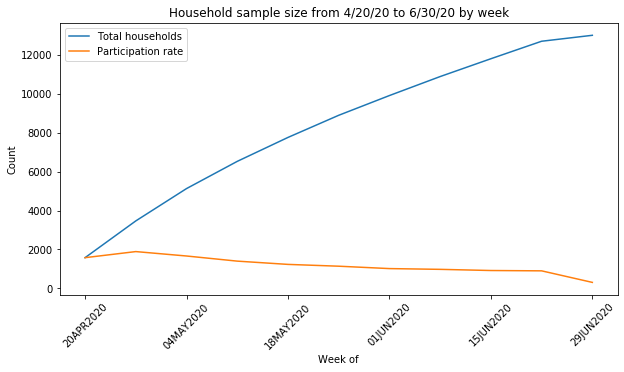

In [63]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot3 = df2.plot.line(x="week_joined", y="house_cumulative", label = 'Total households', ax=ax)
plot4 = df2.plot.line(x="week_joined", y="num_house", label = 'Participation rate', ax=ax)
plt.xticks(rotation=45);
plt.title('Household sample size from 4/20/20 to 6/30/20 by week')
plt.xlabel('Week of')
plt.ylabel('Count');

## Respondent demographics

In [75]:
df3_age = df3[10:18]
df3_age.columns = ['drop', 'Age', 'Frequency', 'Percent']
df3_age = df3_age.drop(['drop'], axis=1)

In [76]:
df3_age

,Age,Frequency,Percent
10,Less than 20y,57,0.0197027
11,20-29,272,0.09402
12,30-39,413,0.142758
13,40-49,506,0.174905
14,50-59,576,0.199101
15,60-69,702,0.242655
16,70-79,338,0.116834
17,80+,29,0.0100242


In [85]:
age_vals = df3_age['Percent'].values.flatten().tolist()
age_labels = df3_age['Age'].tolist()

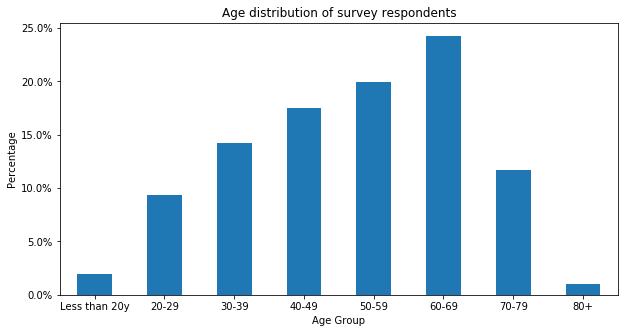

In [116]:
age_demog = pd.DataFrame({'age':age_vals}, index = age_labels)
Aplot = age_demog.plot.bar(legend = False, figsize=(10,5));
Aplot.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Age distribution of survey respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=0);
plt.ylabel('Percentage');

In [107]:
df3_occ = df3[33:39]
df3_occ.columns = ['drop', 'Occupation', 'Frequency', 'Percent']
df3_occ = df3_occ.drop(['drop'], axis=1)

In [109]:
occ_vals = df3_occ['Percent'].values.flatten().tolist()
occ_labels = df3_occ['Occupation'].tolist()

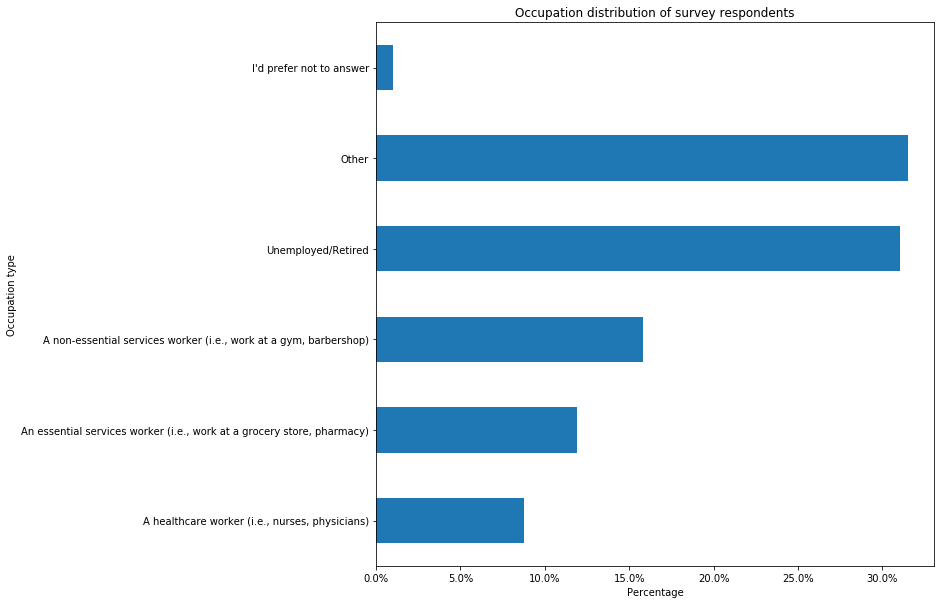

In [115]:
occ_demog = pd.DataFrame({'occ':occ_vals}, index = occ_labels)
Bplot = occ_demog.plot.barh(legend = False, figsize=(10,10));
Bplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Occupation distribution of survey respondents')
plt.xlabel('Percentage')
plt.ylabel('Occupation type');

## Comorbidities across total participants

In [122]:
df4 = df4[2:]
df4.columns = ['drop', 'comorbidity', 'count', '%total']
df4 = df4.drop(['drop'], axis=1)

In [128]:
comorb_vals = df4['%total'].values.flatten().tolist()
comorb_labels = df4['comorbidity'].tolist()

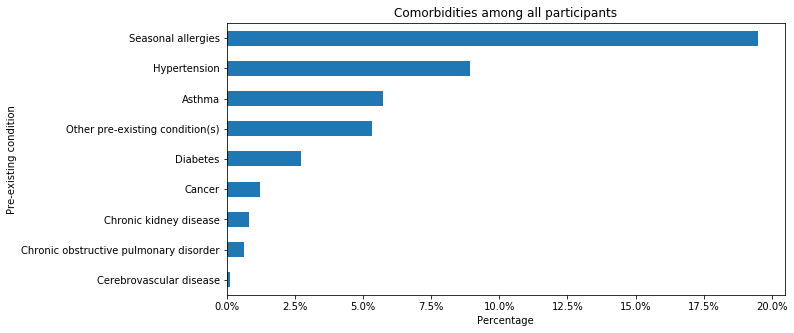

In [130]:
comorb = pd.DataFrame({'comorbidities':comorb_vals}, index = comorb_labels)
comorb.sort_values('comorbidities',inplace=True)
Cplot = comorb.plot.barh(legend = False, figsize=(10,5));
Cplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Comorbidities among all participants')
plt.xlabel('Percentage')
plt.ylabel('Pre-existing condition');

## Contact with positive Covid patient in past two weeks